In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/content/placement.csv')
data


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [9]:
(data.dtypes)

,0
Unnamed: 0,int64
cgpa,float64
iq,float64
placement,int64


In [10]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [11]:
data.isnull().sum()

,0
Unnamed: 0,0
cgpa,0
iq,0
placement,0


In [12]:
target=data['placement']
target

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [13]:
features=data.drop('placement',axis=1)
features

,Unnamed: 0,cgpa,iq
0,0,6.8,123.0
1,1,5.9,106.0
2,2,5.3,121.0
3,3,7.4,132.0
4,4,5.8,142.0
...,...,...,...
95,95,4.3,200.0
96,96,4.4,42.0
97,97,6.7,182.0
98,98,6.3,103.0


In [14]:
print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (100, 3)
Target shape: (100,)


In [15]:
y=data['placement']
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [16]:
X= pd.get_dummies(data)
X


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(240, activation='leaky_relu'),
    tf.keras.layers.Dense(200, activation='leaky_relu'),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(1,)
])

In [19]:
# Compile the model
model.compile(loss= tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics =['mae'])

In [20]:

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 67.9281 - mae: 5.3883 - val_loss: 0.4959 - val_mae: 0.6299
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.1008 - mae: 3.4144 - val_loss: 61.9091 - val_mae: 7.6094
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 44.8362 - mae: 6.0514 - val_loss: 7.2148 - val_mae: 2.5721
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.8618 - mae: 3.3519 - val_loss: 16.7209 - val_mae: 4.0367
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.4272 - mae: 3.0994 - val_loss: 0.6930 - val_mae: 0.6847
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4420 - mae: 1.2943 - val_loss: 8.9556 - val_mae: 2.7177
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8229 - mae: 2.4389 - val_loss: 1.0414 - val_mae: 0.9365
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0589 - mae: 0.8660 - val_loss: 2.3946 - val_mae: 1.4419
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.4113 

In [21]:
# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0299 - mae: 0.0531
Test Loss: 0.0299
Test MAE: 0.0531


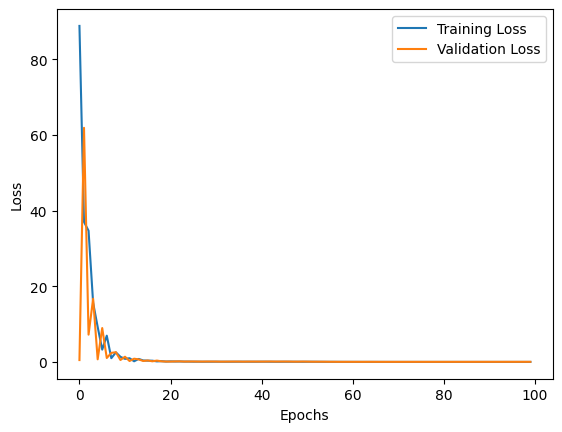

In [22]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()